In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from test import *
import numpy as np

/home/lucas/.conda/envs/research_project/lib/python3.11/site-packages/torch/nn/modules/conv.py:456: UserWarning: Applied workaround for CuDNN issue, install nvrtc.so (Triggered internally at /opt/conda/conda-bld/pytorch_1699449183005/work/aten/src/ATen/native/cudnn/Conv_v8.cpp:80.)
  return F.conv2d(input, weight, bias, self.stride,


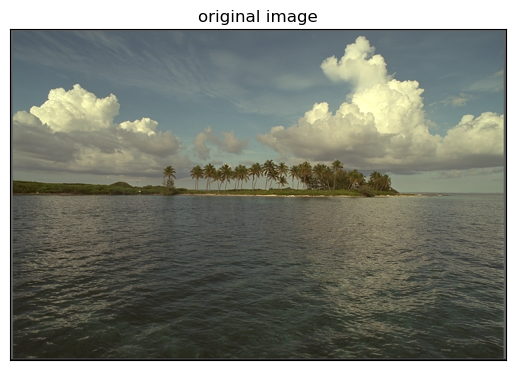

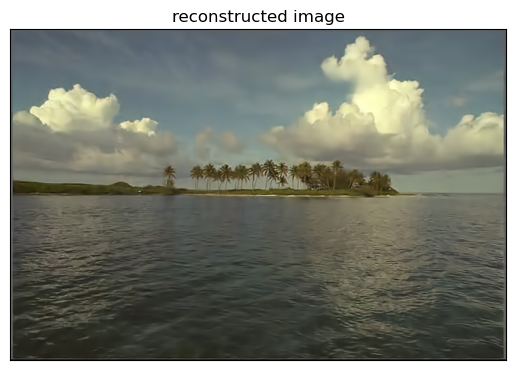

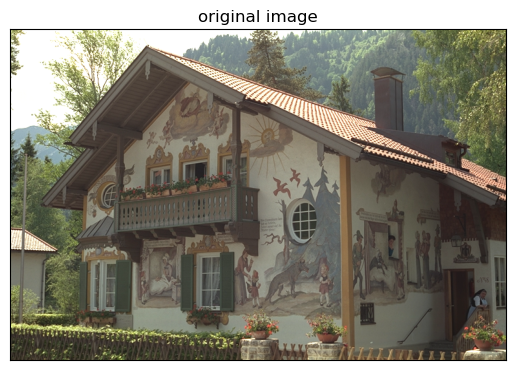

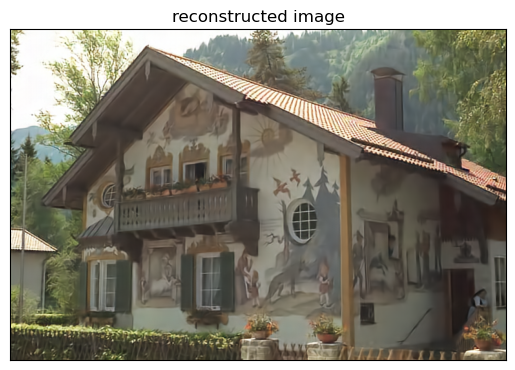

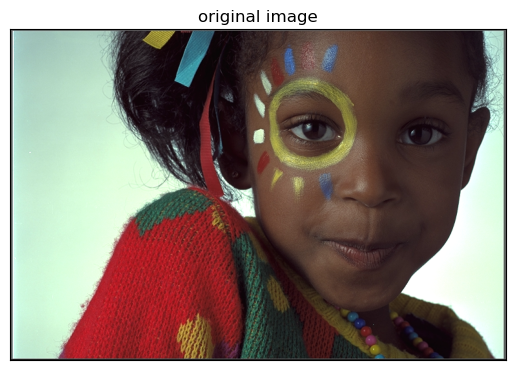

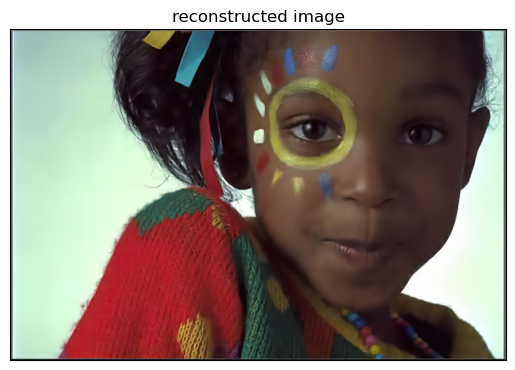

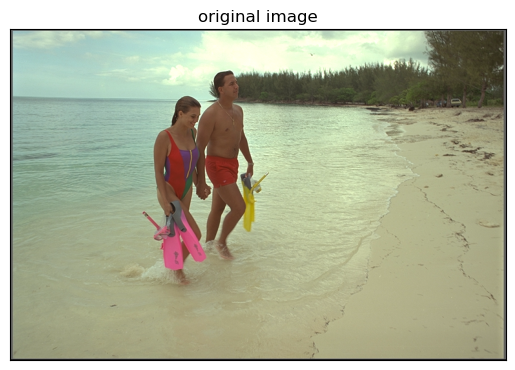

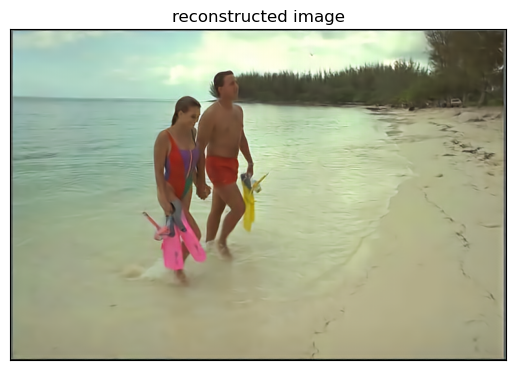

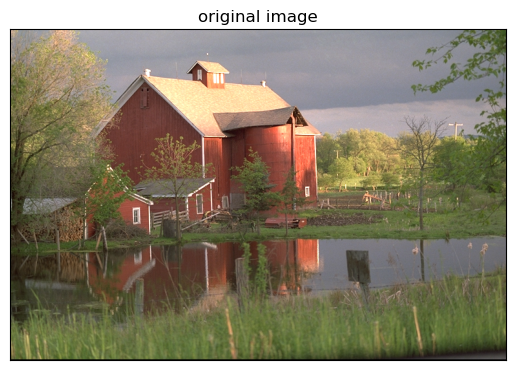

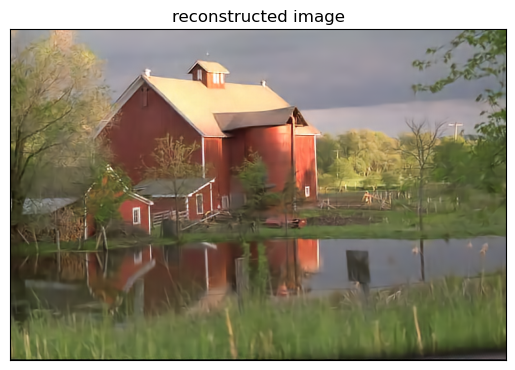

In [3]:
selection = np.random.choice(24,5)
test("./checkpoints/baseline/iter_1590000.pth.tar",selection)